# MNIST Classification - with Hyperparameter Tunning

# 1 | Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
from random import randint
import pandas as pd

In [2]:
tf.__version__

'2.15.0'

# 2 | Dataset Downloading

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# 3 | Dataset Overview

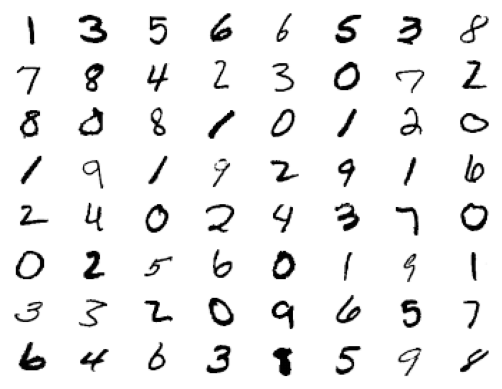

In [4]:
for i in range(64):
  ax = plt.subplot(8, 8, i+1)
  ax.axis('off')
  plt.imshow(x_train[randint(0, x_train.shape[0])], cmap='Greys')


In [6]:
x_train.shape

(60000, 28, 28)

- Dense layers handle 1-dimensional data, so let's reshape each 28x28 images to be 1x728

# 4 | Data Preparation

In [7]:
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0], image_size)

- we need to use categorical(one-hot) encoding

In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

- Let's create a DataFrame for our results

In [9]:
results_df = pd.DataFrame(columns=['description', 'batch_size', 'epochs', 'accuracy', 'loss'])

- Let's build a class for creating our models.<br>
This class takes a list of layer dimensions and programmatically builds our network

In [10]:
class Net():
  def __init__(self, layers, num_classes=10, show_summary=False, optimizer='sgd'):
      """
      Net() class build a DNN with provided config, and provides functions for training, evaluation,
      and displaying training statistics

      :param layers: List defining the number of neurons in each layer
      :param num_classes: Number of classes in the classification problem
      :param show_summary: Show model.summary() Default is false
      """
      keras.backend.clear_session()
      self.model = Sequential()
      self.model.add(Dense(layers[0], activation='sigmoid', input_shape=(image_size,)))

      self.layers = layers
      if len(layers) > 1:
          for layer in layers[1:]:
              self.model.add(Dense(layer, activation='sigmoid'))

      # Output layer with fixed size equal to the number of classes
      self.model.add(Dense(num_classes, activation='softmax'))

      self.model.compile(optimizer=optimizer,
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])
      self.history = None
      self.loss = None
      self.accuracy = None

      if show_summary:
          self.model.summary()

      self.description = f'Model Layers: {layers} '
      self.batch_size = 0
      self.epochs = 0

  def train(self,
           x_train,
           y_train,
           batch_size,
           epochs,
           verbose=False,
           early_stopping_patience=None):
   """
   train():

   train the model
    :param x_train: training features
    :param y_train: training labels
    :param batch_size: batch size to use in training
    :param epochs: num epochs for training
    :param verbose: versbisity level for fit()
    :param early_stopping_patience: if set, add the early stopping callback and set
    patience to this value
   """
   self.batch_size = batch_size
   self.epochs = epochs
   if early_stopping_patience:
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=early_stopping_patience
        )
    ]
   else:
    callbacks = []
   self.history = self.model.fit(
       x_train,
       y_train,
       batch_size=batch_size,
       epochs=epochs,
       verbose=verbose,
       validation_split=.1,
       callbacks=callbacks
   )

  def evaluate(self, x_test, y_test):
    """
    evaluate():

    evaluate model performance

    :param x_test: test features
    :param y_test: test labels
    """
    self.loss, self.accuracy = self.model.evaluate(x_test, y_test, verbose=False)

  def plot_training_history(self):
    """
    plot_training_history():

    plot the training history for the most recent training run, together with
    the latest evaluation metrics.

    append these to the global results_df for tracking each network architecture
    and it's training / testing performance
    """

    plt.plot(self.history.history['accuracy'])
    plt.plot(self.history.history['val_accuracy'])
    plt.title(f'Model Accuracy: {self.layers}')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print(f'Test loss: {self.loss:.3}')
    print(f'Test accuracy: {self.accuracy:.3}')
    print('*'*20)
    print()
    global results_df
    results_df = pd.concat(
        [results_df,
         pd.DataFrame.from_dict({
             'description': [self.description],
             'batch_size' : [self.batch_size],
             'epochs' : [self.epochs],
             'accuracy' : [self.accuracy],
             'loss' : [self.loss]
         })],
        ignore_index=True

    )



# 5 | Solving Problem Statements


### Problem Statement 1: Varying Numbers of Layers
**Objective:** Investigate the impact of varying the number of hidden layers on model performance.

- **Parameters:**
  - Number of hidden layers: 1 to 5
  - Neurons per layer: 32
  - Optimizer: SGD
  - Batch size: 128
  - Epochs: 5
  - Early stopping: None

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


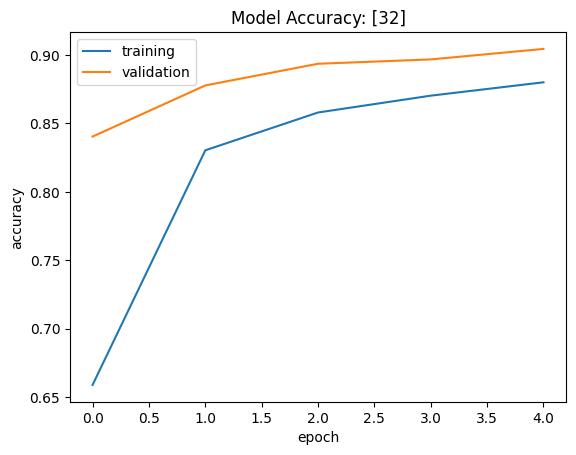

Test loss: 0.491
Test accuracy: 0.889
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


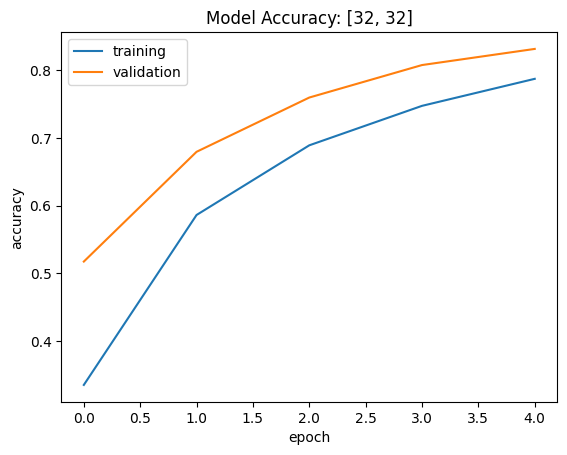

Test loss: 1.21
Test accuracy: 0.808
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


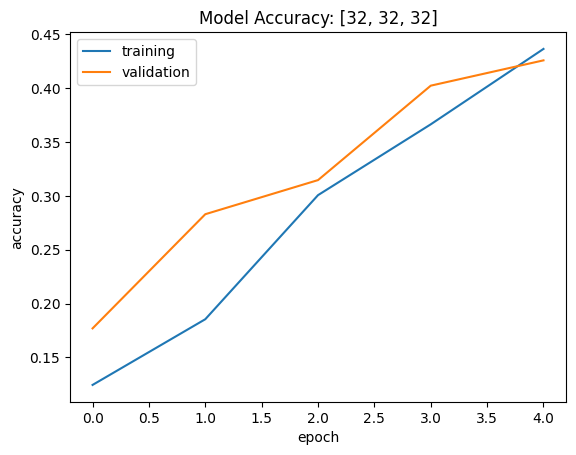

Test loss: 2.1
Test accuracy: 0.422
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 28618 (111.79 KB)
Trainable params: 28618 (111.79 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________

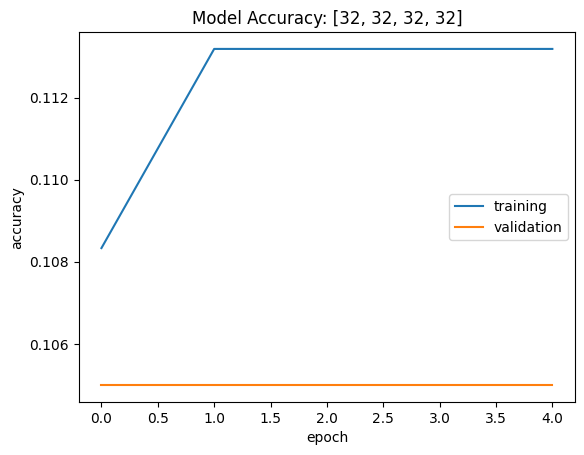

Test loss: 2.3
Test accuracy: 0.113
********************



In [11]:
for i in range(1, 5):
  layers = [32] * i
  net = Net(layers, show_summary=True)
  net.train(x_train, y_train, batch_size=128, epochs=5)
  net.evaluate(x_test, y_test)
  net.plot_training_history()

### Problem Statement 2: Varying Numbers of Neurons in a Single Hidden Layer
**Objective:** Explore the effect of changing the number of neurons in a single hidden layer.

- **Parameters:**
  - Number of neurons: 32, 64, 128, 256, 512, 1024, 2048
  - Hidden layers: 5 layers with 32 neurons each
  - Optimizer: SGD
  - Batch size: 128
  - Epochs: 5
  - Early stopping: None

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25450 (99.41 KB)
Trainable params: 25450 (99.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


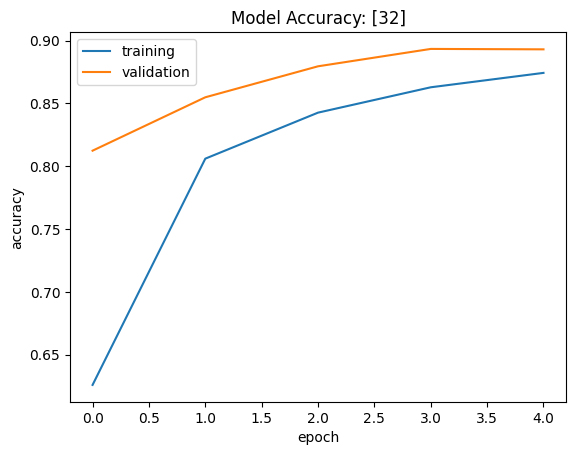

Test loss: 0.492
Test accuracy: 0.88
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


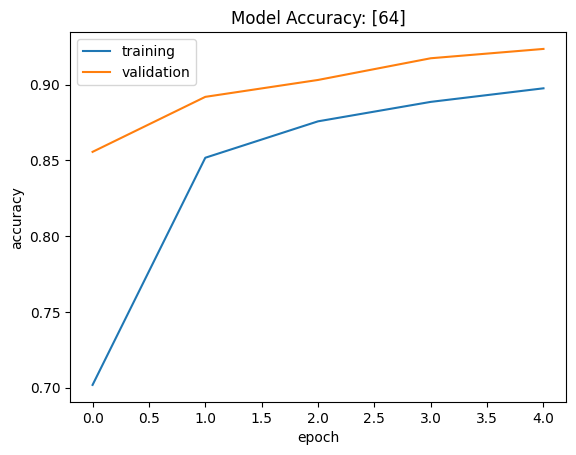

Test loss: 0.376
Test accuracy: 0.906
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


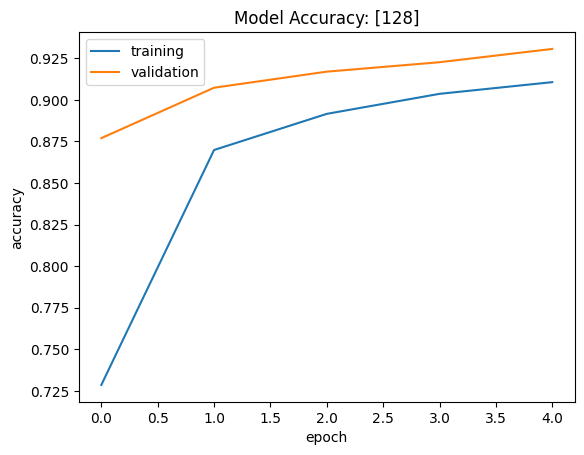

Test loss: 0.319
Test accuracy: 0.916
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


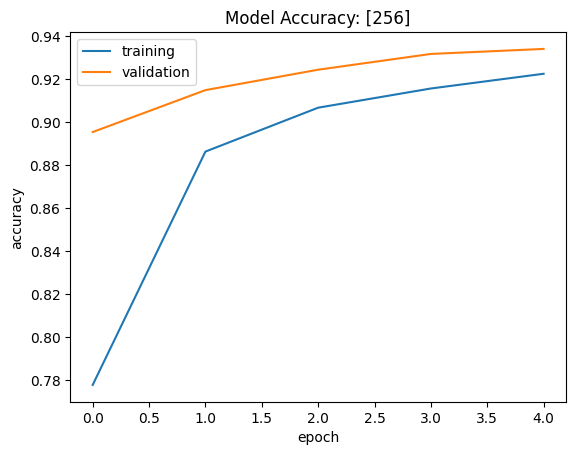

Test loss: 0.274
Test accuracy: 0.924
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


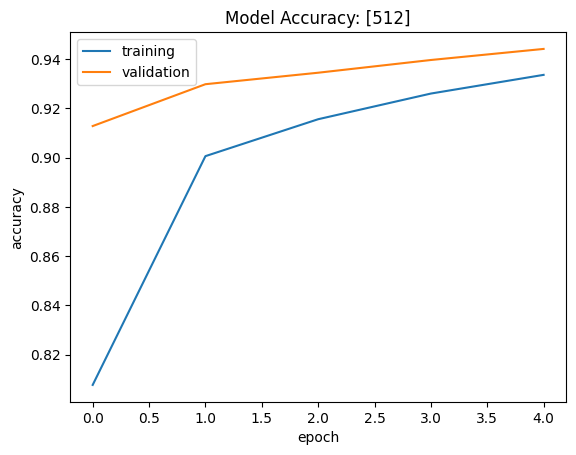

Test loss: 0.237
Test accuracy: 0.936
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 814090 (3.11 MB)
Trainable params: 814090 (3.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


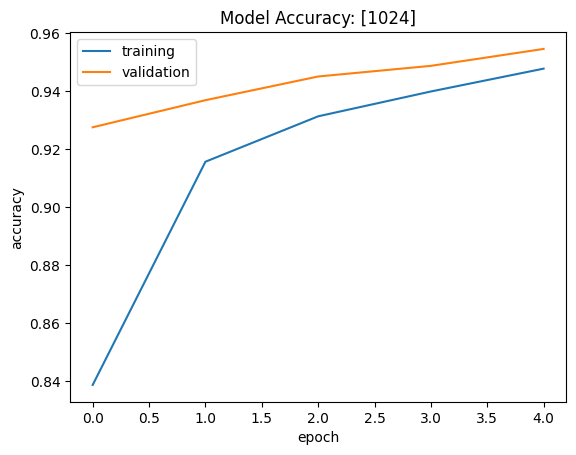

Test loss: 0.206
Test accuracy: 0.943
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 1628170 (6.21 MB)
Trainable params: 1628170 (6.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


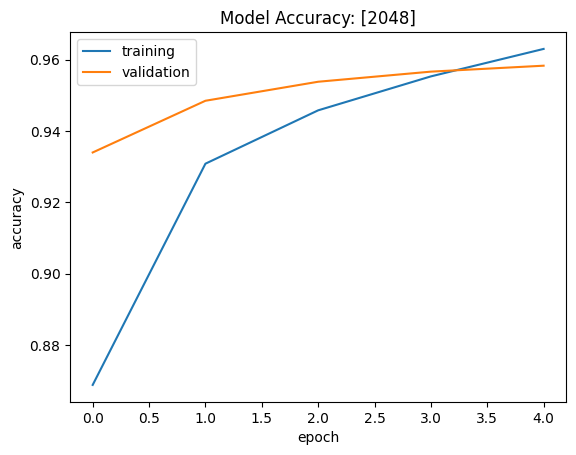

Test loss: 0.177
Test accuracy: 0.949
********************



In [14]:
neurons = [32, 64, 128, 256, 512, 1024, 2048]

for num_neurons in neurons:
    layers = [num_neurons]
    net = Net(layers, show_summary=True)
    net.train(x_train, y_train, batch_size=128, epochs=5)
    net.evaluate(x_test, y_test)
    net.plot_training_history()


### Problem Statement 3: Varying Batch Sizes
**Objective:** Examine the influence of different batch sizes on model training.

- **Parameters:**
  - Batch sizes: 128, 64, 32, 16
  - Hidden layers: 5 layers with 32 neurons each
  - Optimizer: SGD
  - Epochs: 50
  - Early stopping patience: 5

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 29674 (115.91 KB)
Trainable params: 29674 

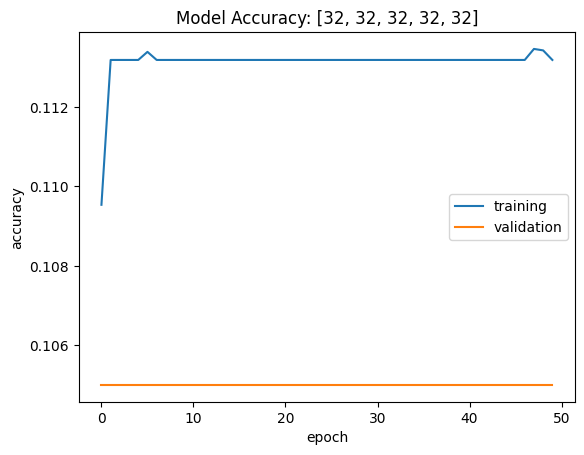

Test loss: 2.28
Test accuracy: 0.113
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                               

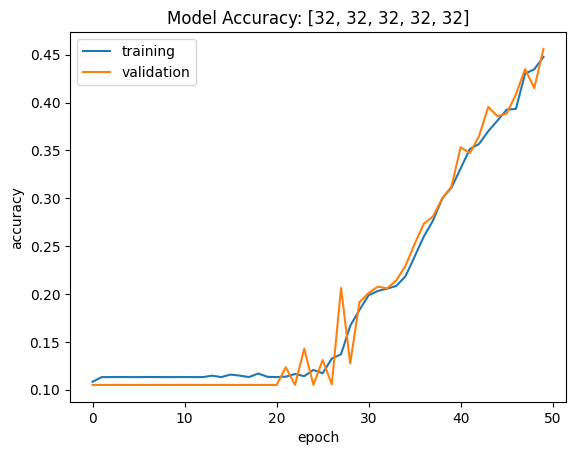

Test loss: 1.45
Test accuracy: 0.461
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                               

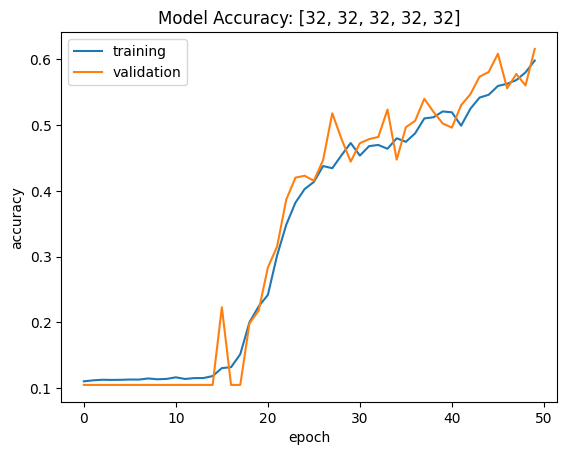

Test loss: 1.14
Test accuracy: 0.614
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                               

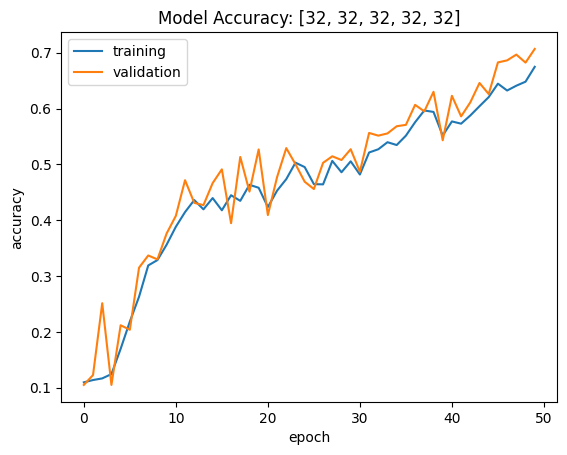

Test loss: 0.951
Test accuracy: 0.679
********************



In [15]:
batch_sizes = [128, 64, 32, 16]
hidden_layers = [32, 32, 32, 32, 32]  # 5 hidden layers with 32 neurons each

for batch_size in batch_sizes:
    net = Net(hidden_layers, show_summary=True, optimizer='sgd')
    net.train(x_train, y_train, batch_size=batch_size, epochs=50, early_stopping_patience=5)
    net.evaluate(x_test, y_test)
    net.plot_training_history()

### Problem Statement 4: Varying Number of Layers and Neurons in Each Layer
**Objective:** Investigate the combined effect of varying the number of layers and neurons in each layer.

- **Parameters:**
  - Layer configurations:
    1. [1024, 128]
    2. [1024, 512, 128]
    3. [2048, 1024, 128]
  - Optimizer: SGD
  - Batch size: 16 (from probelm statement 3: we have highest accuracy compared to other batch sizes as tested)
  - Epochs: 50
  - Early stopping patience: 5


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 128)               131200    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 936330 (3.57 MB)
Trainable params: 936330 (3.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


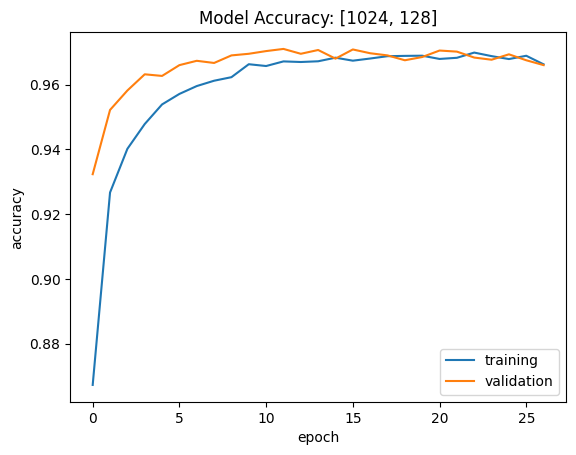

Test loss: 0.124
Test accuracy: 0.963
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1395594 (5.32 MB)
Trainable params: 1395594 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


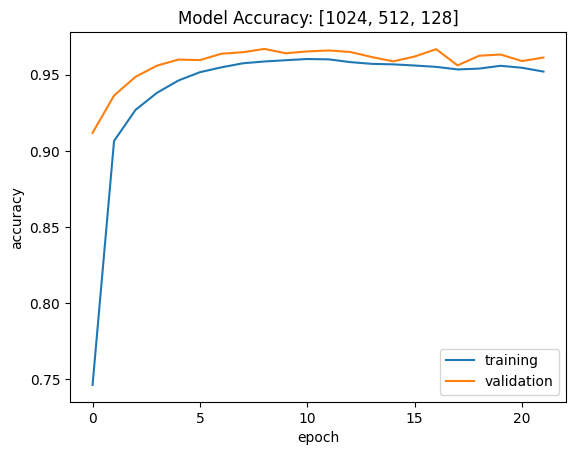

Test loss: 0.161
Test accuracy: 0.952
********************

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              1607680   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 128)               131200    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3838346 (14.64 MB)
Trainable params: 3838346 (14.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


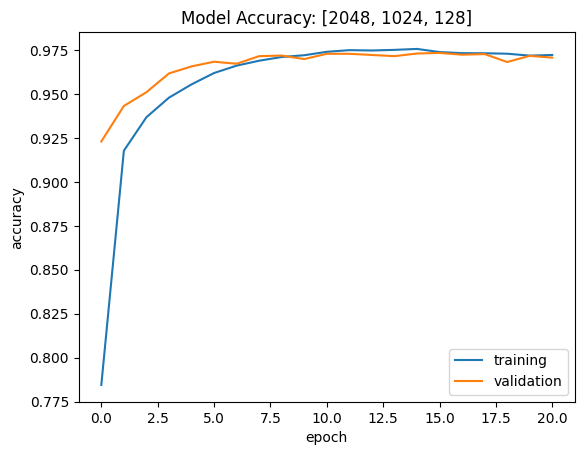

Test loss: 0.11
Test accuracy: 0.966
********************



In [17]:
layer_configs = [
    [1024, 128],
    [1024, 512, 128],
    [2048, 1024, 128]
]

for layers in layer_configs:
    net = Net(layers, show_summary=True, optimizer='sgd')
    net.train(x_train, y_train, batch_size=16, epochs=50, early_stopping_patience=5)
    net.evaluate(x_test, y_test)
    net.plot_training_history()


# 6 | Conclusion

In [19]:
results_df.sort_values(by='accuracy', ascending=False)

,description,batch_size,epochs,accuracy,loss
18,"Model Layers: [2048, 1024, 128]",16,50,0.9661,0.109993
16,"Model Layers: [1024, 128]",16,50,0.9630,0.123881
15,"Model Layers: [1024, 128]",128,50,0.9526,0.152547
17,"Model Layers: [1024, 512, 128]",16,50,0.9525,0.161226
10,Model Layers: [2048],128,5,0.9492,0.176843
9,Model Layers: [1024],128,5,0.9427,0.205994
8,Model Layers: [512],128,5,0.9356,0.237170
7,Model Layers: [256],128,5,0.9241,0.273865
6,Model Layers: [128],128,5,0.9159,0.318743
5,Model Layers: [64],128,5,0.9064,0.376261


<div style="background-color: #f0f0f0; padding: 20px;">

  <div>
    <h3 style="color: #555;">Effect of Model Complexity:</h3>
    <p>
      <ul>
        <li>Models with deeper architectures (more layers) tend to perform better in terms of accuracy and loss compared to shallower architectures. For example, the model with layers [2048, 1024, 128] achieved the highest accuracy of 0.9661.</li>
        <li>However, excessively deep architectures may lead to overfitting, as seen in models with very deep architectures ([32, 32, 32, 32, 32]) that achieved low accuracy and high loss.</li>
      </ul>
    </p>
  </div>

  <div>
    <h3 style="color: #555;">Impact of Batch Size and Epochs:</h3>
    <p>
      <ul>
        <li>Generally, models trained with smaller batch sizes and more epochs tend to achieve better performance. For example, the model with layers [1024, 128] trained with a batch size of 16 and 50 epochs achieved higher accuracy compared to the same architecture trained with a batch size of 128.</li>
        <li>However, training for too many epochs may lead to overfitting, as observed in some models with deeper architectures trained for 50 epochs.</li>
      </ul>
    </p>
  </div>

  <div>
    <h3 style="color: #555;">Optimal Model Configuration:</h3>
    <p>
      <ul>
        <li>The optimal model configuration appears to be moderately deep architectures (2 to 3 layers) with a reasonable number of neurons per layer (e.g., [1024, 128] or [1024, 512, 128]) trained with smaller batch sizes and more epochs.</li>
        <li>Models with extremely shallow architectures ([32], [32, 32]) or extremely deep architectures ([32, 32, 32, 32, 32]) tend to perform poorly.</li>
      </ul>
    </p>
  </div>

  <div>
    <h3 style="color: #555;">Early Stopping:</h3>
    <p>
      <ul>
        <li>Utilizing early stopping can help prevent overfitting in models trained for a large number of epochs. This can be observed in models trained for 50 epochs, where some deeper architectures experienced a decrease in performance.</li>
      </ul>
    </p>
  </div>

</div>
